2023105406 소프트웨어융합학과 고윤재
# 주제 및 선정 이유

## 1. 주제
* 10만장 이상 팔린 게임들의 판매량 분석

## 1.1 주제 선정 이유
* 콘솔게임에 평소 관심이 많았고, 분석을 위해 데이터를 찾던 중 이 데이터셋을 보고 증명해보고 싶은 가설들이 생겼기 때문에 해당 주제를 선정하게 되었다.

## 2. 가설

1. 슈팅게임의 판매량이 가장 높을 것이다

2. 플랫폼이 pc인 게임의 판매량이 기기를 따로 필요로하는 콘솔게임의 판매량보다 높을 것이다.

3. 과거 게임보다는 최근 게임의 판매량이 더 높을 것이다.

4. 지역 별로 선호되는 게임 장르가 다를 것이다.


## 3. 데이터 획득 및 가공

### 3.1 데이터 출처

* https://www.kaggle.com/gregorut/videogamesales

### 3.2 분석을 위한 데이터 가공

먼저 Kaggle에서 10만장 이상 팔린 게임들의 지역별 판매량, 발매사, 발매년도, 등의 데이터가 들어있는 csv파일을 다운로드 받았다.
파이썬으로 불러온 후 데이터의 컬럼 명들을 영어에서 한국어로 변경하였다. 초기 데이터는 총 행 16597개로 구성되었고 결측값이 존재했기에 결측값을 처리하였다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


우선 pandas를 이용해 불러온 데이터는 다음과 같다. 총 16597개의 행으로 구성되어있음을 알 수 있다. 
아래 코드에서는 이해의 편의성을 위해 컬럼명을 한글로 변경하였다. 

In [3]:
df.columns = ['id','이름','플랫폼','출시년도','장르','발매자','북미판매량','유럽판매량','일본판매량','기타판매량','글로벌판매량']
df.head()

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.isnull().sum() #결측값 개수 측정

id          0
이름          0
플랫폼         0
출시년도      271
장르          0
발매자        58
북미판매량       0
유럽판매량       0
일본판매량       0
기타판매량       0
글로벌판매량      0
dtype: int64

결측값의 개수를 측정해본 결과 출시년도 컬럼에 결측값이 271개, 발매자 컬럼에는 결측값이 58개가 있음을 알 수 있었다.

우선 출시년도의 결측값은 전체 데이터의 출시년도 컬럼의 값의 평균으로 채워넣기 위해 year_mean 변수에 평균 출시년도를 구해주었다.

In [5]:
year_mean = round(df['출시년도'].mean(),1) 
year_mean 

2006.4

이후 출시년도 결측값에는 평균값을 아래와 같이 대입해주었다.

In [6]:
df['출시년도'] = df['출시년도'].fillna(year_mean)#출시년도 결측값에는 평균값 대입
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


발매자 컬럼의 결측값 같은 경우에는 임의의 값으로 채워넣을 수가 없으므로 해당 결측값이 존재하는 행을 삭제하였다.

In [7]:
df.dropna(inplace=True) #결측값이 있는 행 삭제
df.isnull().sum()

id        0
이름        0
플랫폼       0
출시년도      0
장르        0
발매자       0
북미판매량     0
유럽판매량     0
일본판매량     0
기타판매량     0
글로벌판매량    0
dtype: int64

그리고 pc와 콘솔 게임을 구분할 수 있도록 pc/console을 구분하는 컬럼을 새로 생성해준다.

In [8]:
df['pc_console']='0' #게임을 pc게임과 콘솔게임 두개로 나눔
df

,id,이름,플랫폼,출시년도,장르,발매자,북미판매량,유럽판매량,일본판매량,기타판매량,글로벌판매량,pc_console
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0


콘솔 게임의 플랫폼 종류가 더 다양하기 때문에 모두를 우선 console로 초기화한 후 플랫폼이 'PC'인 행의 pc_console 컬럼값을 'PC'로 변경해준다.

In [9]:
df['pc_console'] = 'console'
df.loc[df['플랫폼'] == 'PC','pc_console'] = 'PC' #플랫폼이 pc이면 PC

## 4. 분석 결과
### 4.1. 가설 1 : '슈팅' 장르의 게임의 판매량이 가장 높을 것이다.

In [10]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'AppleMyungjo'

<Figure size 1500x1000 with 0 Axes>

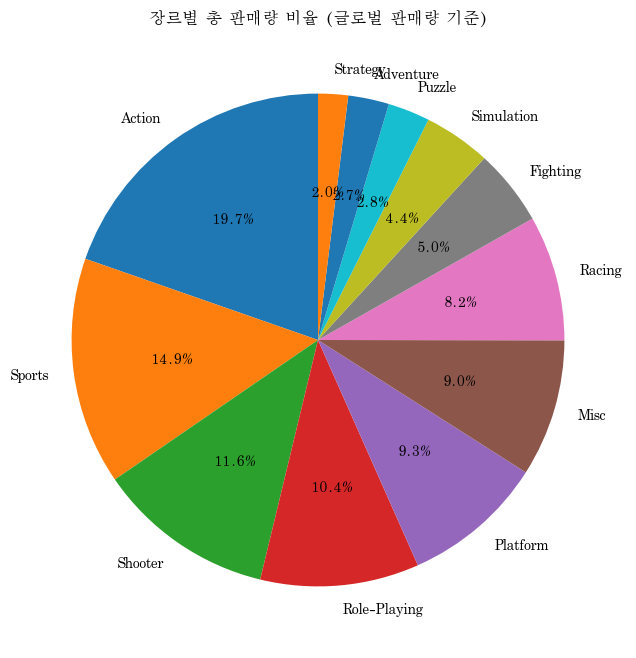

In [11]:
sales_by_genre = df.groupby('장르')['글로벌판매량'].sum()

# 글로벌 판매량 기준으로 오름차순 정렬
sales_by_genre_sorted = sales_by_genre.sort_values(ascending=False)

# Pie chart 그리기
plt.figure(figsize=(8, 8))
plt.pie(sales_by_genre_sorted, labels=sales_by_genre_sorted.index, autopct='%1.1f%%',startangle=90)
plt.title('장르별 총 판매량 비율 (글로벌 판매량 기준)')

# 그래프 표시
plt.show()

#### '슈팅'게임이 가장 많이 팔릴 것이라고 예상한 것은 내가 다른 장르의 게임에선 재미를 별로 느끼지 못했기 때문이다.

#### '슈팅'게임이란, 점수를 얻기 위해 어떤 물체를 공격하며 진행하는 게임이고,

#### '액션'게임이란 점수를 얻기 위해 직접적으로 어떤 행동을 취해서 게임을 진행해 나가야 한다는 차이점이 있다고 한다.

#### 차이는 있지만 말로만 보고는 이해하기 어려운 만큼 큰 의미는 없다고 보인다.

### 4.2. 가설 2 : 개발의 편의성으로 인해 PC플랫폼의 게임이 콘솔게임보다 많을 것이다.

In [12]:
df.pc_console.value_counts()

console    15586
PC           954
Name: pc_console, dtype: int64

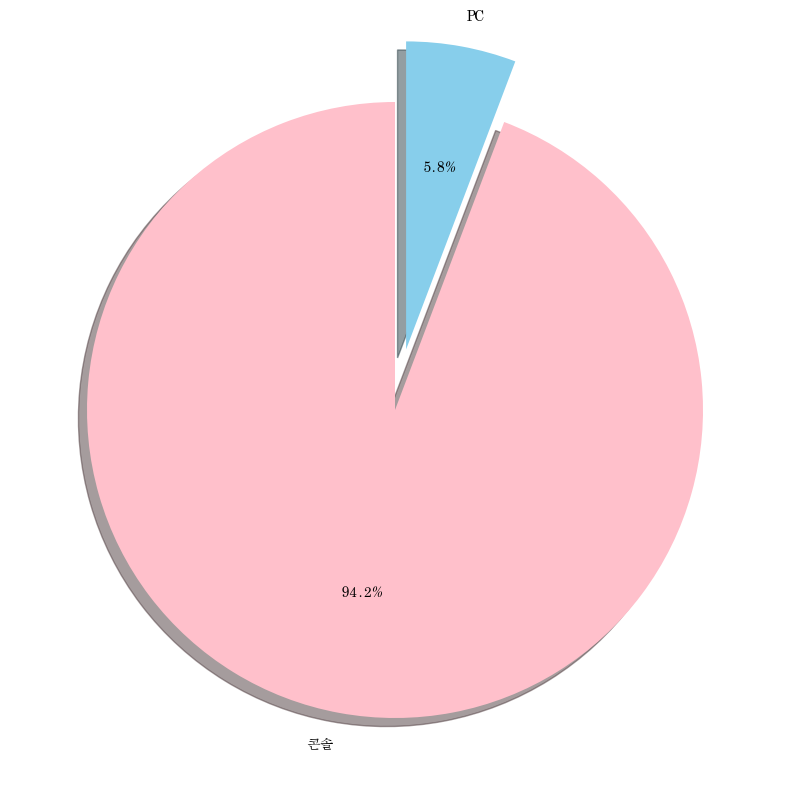

In [13]:
plt.figure(figsize=(15,10))
plt.pie(df.pc_console.value_counts(),labels=['콘솔','PC'],explode=[0,0.2],autopct='%.1f%%',colors = ['pink','skyblue'],shadow=True,startangle=90)
plt.show() #explode : 그래프 일부 튀어나오게 하는거, color : 그래프 색

#### 콘솔 게임이 PC게임보다 훨씬 많이 존재하는 것을 확인할 수 있다.

### 4.3. 가설 3 : 과거 게임보다 최근 게임의 판매량이 더 높을 것이다.

In [14]:
def calculate_sales_by_year(df):

    sales_by_year = df.groupby('출시년도')['글로벌판매량'].sum()

    return sales_by_year

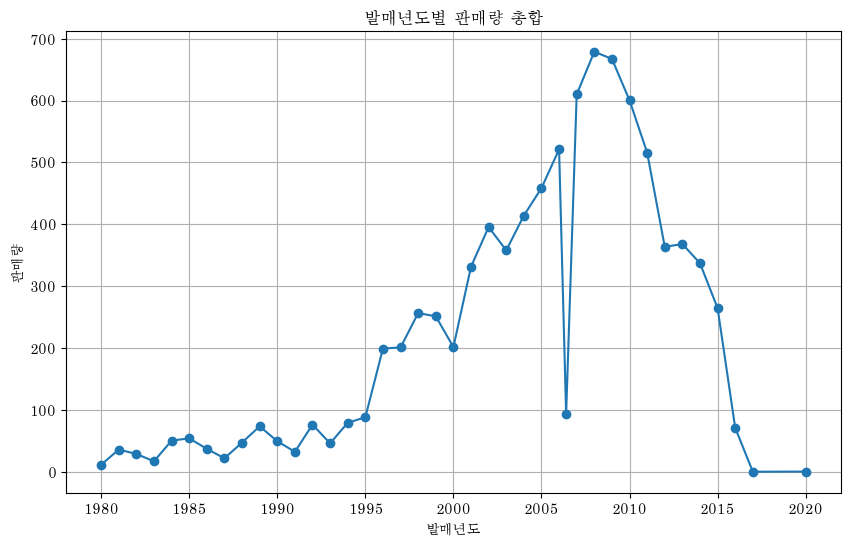

In [15]:
sales_by_year = calculate_sales_by_year(df)
sales_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('발매년도')
plt.ylabel('판매량')
plt.title('발매년도별 판매량 총합')
plt.grid(True)
plt.show()

글로벌 판매량을 기준으로 게임에 대한 인식 변화로 인해 과거보다 최근의 게임 판매량이 높을 것으로 예상했는데, 2010년 쯔음까지 증가하는 추세이다가 하락하기 시작했다.

In [16]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# # 첫 번째 서브플롯: 북미판매량
# sales_by_year = df.groupby('출시년도')['북미판매량'].sum()
# axes[0].plot(sales_by_year.index, sales_by_year.values)
# axes[0].set_xlabel('발매년도')
# axes[0].set_ylabel('북미판매량')
# axes[0].set_title('북미판매량의 연도별 총합')
# axes[0].grid(True)

# # 두 번째 서브플롯: 유럽판매량
# sales_by_year = df.groupby('출시년도')['유럽판매량'].sum()
# axes[1].plot(sales_by_year.index, sales_by_year.values)
# axes[1].set_xlabel('발매년도')
# axes[1].set_ylabel('유럽판매량')
# axes[1].set_title('유럽판매량의 연도별 총합')
# axes[1].grid(True)

# # 세 번째 서브플롯: 일본판매량
# sales_by_year = df.groupby('출시년도')['일본판매량'].sum()
# axes[2].plot(sales_by_year.index, sales_by_year.values)
# axes[2].set_xlabel('발매년도')
# axes[2].set_ylabel('일본판매량')
# axes[2].set_title('일본판매량의 연도별 총합')
# axes[2].grid(True)

# # 그래프 간 간격 조정
# plt.tight_layout()

# # 그래프 표시
# plt.show()

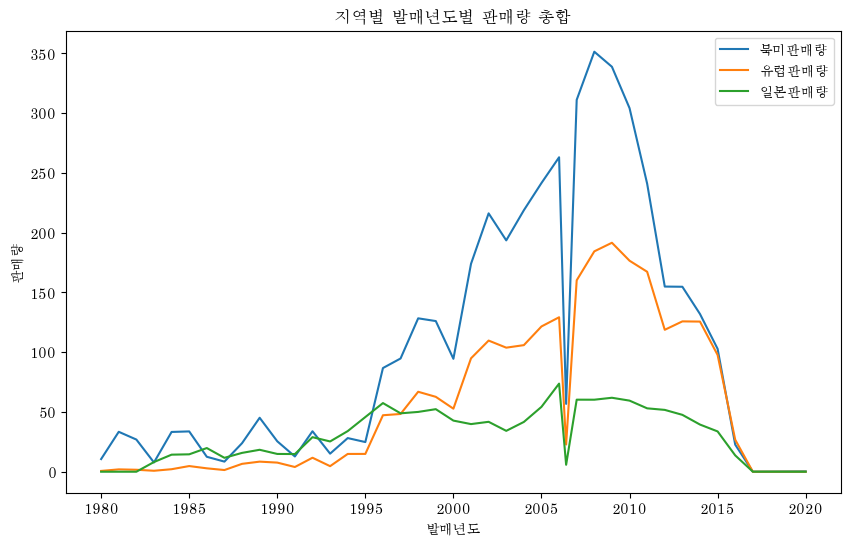

In [17]:
plt.figure(figsize=(10, 6))

# 북미판매량 그래프
sales_by_year = df.groupby('출시년도')['북미판매량'].sum()
plt.plot(sales_by_year.index, sales_by_year.values, label='북미판매량')

# 유럽판매량 그래프
sales_by_year = df.groupby('출시년도')['유럽판매량'].sum()
plt.plot(sales_by_year.index, sales_by_year.values, label='유럽판매량')

# 일본판매량 그래프
sales_by_year = df.groupby('출시년도')['일본판매량'].sum()
plt.plot(sales_by_year.index, sales_by_year.values, label='일본판매량')

# x축, y축, 타이틀, 범례 설정
plt.xlabel('발매년도')
plt.ylabel('판매량')
plt.title('지역별 발매년도별 판매량 총합')
plt.legend()

# 그래프 겹침 설정
plt.gca().set_prop_cycle(None)

# 그래프 표시
plt.show()

#### 북미, 유럽, 일본 내 판매량을 기준으로도 그래프를 그려 보았는데, 일본에서는 북미나 유럽만큼의 증가세가 보이지 않았고 2010년 이후로는 판매량이 감소하고 있다.

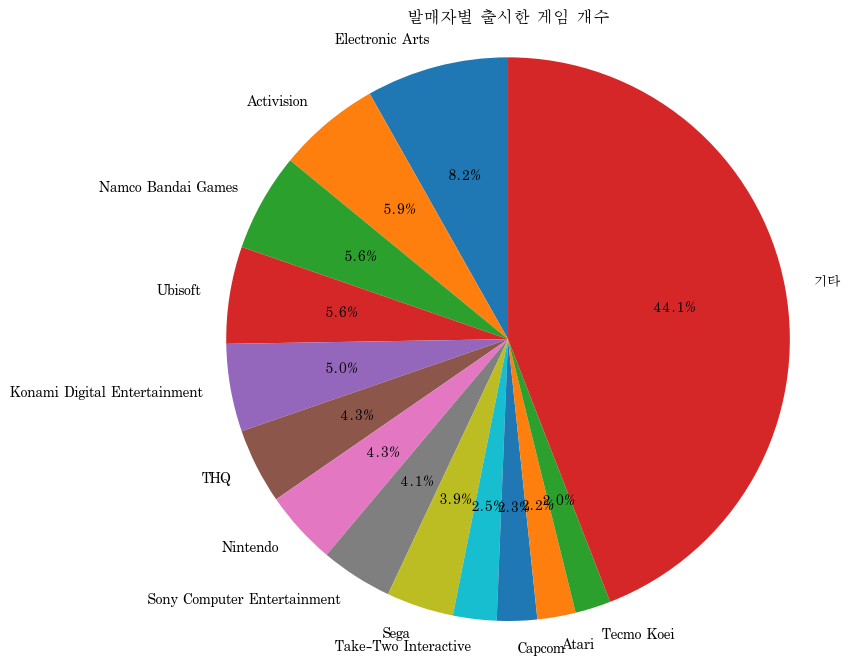

In [18]:
game_counts = df['발매자'].value_counts()

# 1.5% 미만의 비율을 가진 데이터는 '기타'로 묶기
threshold = 0.015
other_count = game_counts[game_counts / game_counts.sum() < threshold].sum()
game_counts = game_counts[game_counts / game_counts.sum() >= threshold]
game_counts['기타'] = other_count


plt.figure(figsize=(8, 8))
plt.pie(game_counts, labels=game_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('발매자별 출시한 게임 개수')
plt.show()

#### 북미/유럽에서 독점하는 게임사의 등장으로 증가한건지 궁금해서 발매자별 점유율을 보았는데 한 회사가 특히 많이 게임을 가지고 있다던가 하는 특징은 보이지 않았다.

## 4.4 가설 4 : 지역별로 선호되는 게임 장르가 다를 것이다.

In [19]:
genres = df['장르'].unique()

# 새로운 DataFrame 생성
new_df = pd.DataFrame(columns=['북미판매량', '유럽판매량', '일본판매량'], index=genres)

# 기존 DataFrame에서 데이터 추출하여 새로운 DataFrame에 할당
new_df['북미판매량'] = df.groupby('장르')['북미판매량'].sum()
new_df['유럽판매량'] = df.groupby('장르')['유럽판매량'].sum()
new_df['일본판매량'] = df.groupby('장르')['일본판매량'].sum()

# 결과 출력
# print(new_df)
new_df

genres = df['장르'].unique()

# 새로운 DataFrame 생성
new_df_na = pd.DataFrame(columns=['북미판매량'], index=genres)
new_df_eu = pd.DataFrame(columns=['유럽판매량'], index=genres)
new_df_jp = pd.DataFrame(columns=['일본판매량'], index=genres)


# 기존 DataFrame에서 데이터 추출하여 새로운 DataFrame에 할당
new_df_na['북미판매량'] = df.groupby('장르')['북미판매량'].sum()
new_df_eu['유럽판매량'] = df.groupby('장르')['유럽판매량'].sum()
new_df_jp['일본판매량'] = df.groupby('장르')['일본판매량'].sum()

# 결과 출력
print(new_df_na)
print(new_df_eu)
print(new_df_jp)

               북미판매량
Sports        682.54
Platform      447.05
Racing        359.42
Role-Playing  327.28
Puzzle        123.78
Misc          404.67
Shooter       582.59
Simulation    183.31
Action        877.54
Fighting      221.92
Adventure     105.67
Strategy       68.64
               유럽판매량
Sports        376.30
Platform      201.13
Racing        238.38
Role-Playing  188.05
Puzzle         50.77
Misc          213.93
Shooter       313.24
Simulation    113.20
Action        524.92
Fighting      100.22
Adventure      64.08
Strategy       45.23
               일본판매량
Sports        135.25
Platform      130.77
Racing         56.69
Role-Playing  352.26
Puzzle         57.31
Misc          107.72
Shooter        38.28
Simulation     63.64
Action        159.49
Fighting       87.35
Adventure      51.99
Strategy       49.34


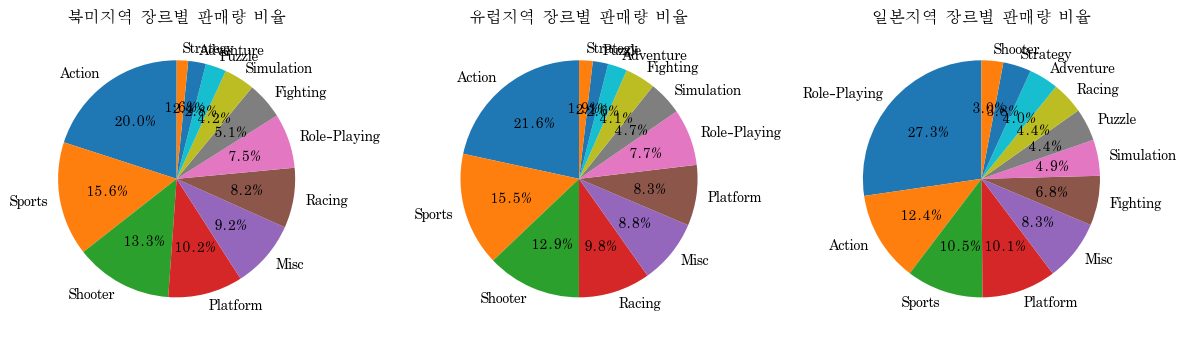

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# 첫 번째 서브플롯: 북미지역 장르별 판매량 비율
new_df_na = new_df_na.sort_values(by='북미판매량',ascending=False)
axes[0].pie(new_df_na['북미판매량'], labels=new_df_na.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('북미지역 장르별 판매량 비율')

# 두 번째 서브플롯: 유럽지역 장르별 판매량 비율
new_df_eu = new_df_eu.sort_values(by='유럽판매량',ascending=False)
axes[1].pie(new_df_eu['유럽판매량'], labels=new_df_eu.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('유럽지역 장르별 판매량 비율')

# 세 번째 서브플롯: 일본지역 장르별 판매량 비율
new_df_jp = new_df_jp.sort_values(by='일본판매량',ascending=False)
axes[2].pie(new_df_jp['일본판매량'], labels=new_df_jp.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('일본지역 장르별 판매량 비율')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

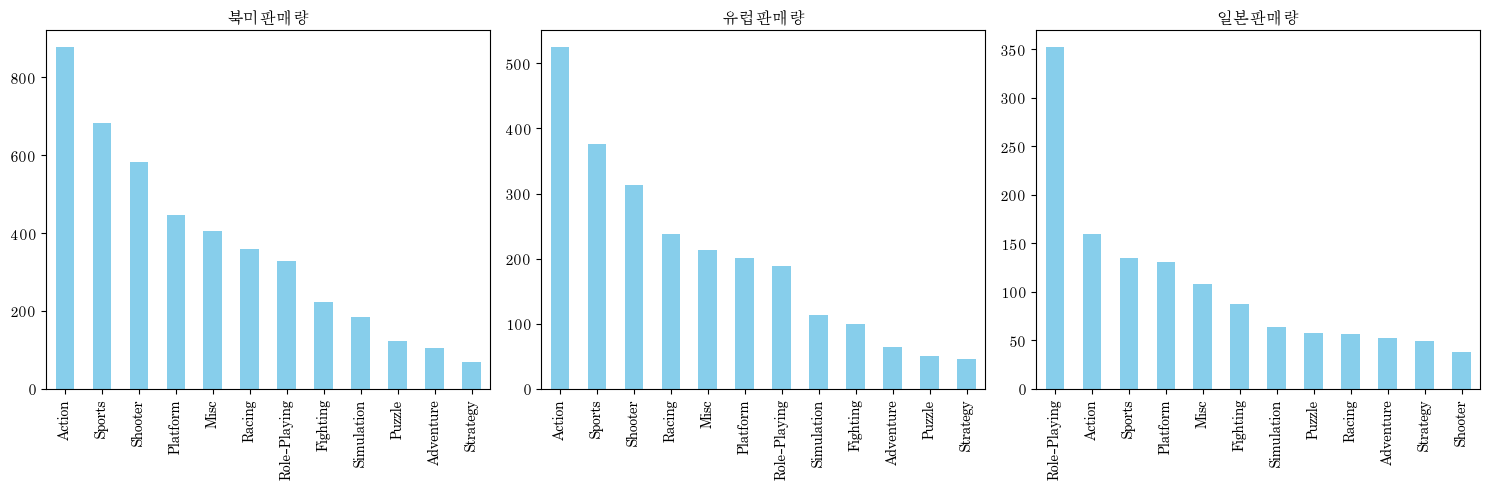

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, region in enumerate(new_df.columns):
    df_region_sorted = new_df[region].sort_values(ascending=False)
    df_region_sorted.plot(kind='bar', ax=axs[i], title=region, color='skyblue')

plt.tight_layout()
plt.show()

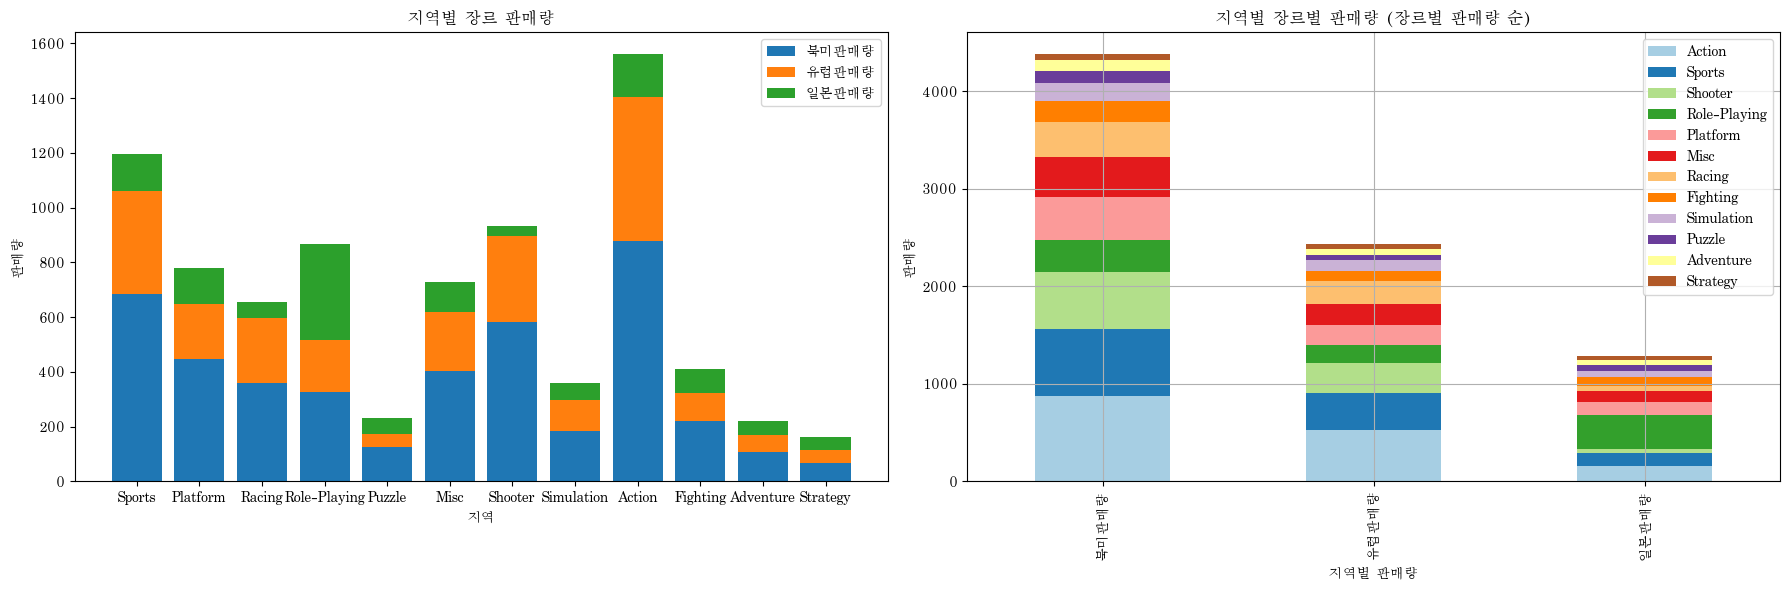

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

region_columns = ['북미판매량', '유럽판매량', '일본판매량']
# 장르 목록
genres = df['장르'].unique()

# 장르별 지역 판매량 계산
genre_sales = df.groupby('장르')[region_columns].sum()

# 각 장르의 총 판매량 계산
genre_total_sales = genre_sales.sum(axis=1)

# 장르를 판매량 순으로 정렬
sorted_genres = genre_total_sales.sort_values(ascending=False).index
sorted_genre_sales = genre_sales.loc[sorted_genres]
colors = plt.cm.Paired(range(len(sorted_genres)))
sorted_genre_sales.transpose().plot(kind='bar', stacked=True, figsize=(18, 6), color=colors, ax=axes[1])

axes[0].bar(new_df.index, new_df['북미판매량'], label='북미판매량')
axes[0].bar(new_df.index, new_df['유럽판매량'], bottom=new_df['북미판매량'], label='유럽판매량')
axes[0].bar(new_df.index, new_df['일본판매량'], bottom=new_df['북미판매량'] + new_df['유럽판매량'], label='일본판매량')

axes[0].set_title('지역별 장르 판매량')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('판매량')
axes[0].legend()

axes[1].set_xlabel('지역별 판매량')
axes[1].set_ylabel('판매량')
axes[1].set_title('지역별 장르별 판매량 (장르별 판매량 순)')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

#### 유럽/북미는 거의 일치하는 선호도를 보였지만 일본의 경우에는 북미/유럽과는 다른 선호도를 보여준다.

## 5. 결론
### 1 :슈팅게임의 판매량이 가장 높을 것이다
* 거짓 -> 액션게임의 판매량이 가장 높았다.

### 2. 플랫폼이 pc인 게임이 콘솔게임보다 더 많을 것이다.
* 거짓 -> PC게임은 따로 집에 콘솔 기기를 구비해놓아야 플레이할 수 있는 콘솔게임에 비해 접근하기 쉽고, 그렇기 때문에 개발의 편의라던지 여러 부분에서 이점이 있어 많이 팔리고, 더 많이 만들어질 줄 알았지만 95%에 가까운 게임들이 콘솔게임이다.

### 3. 과거 게임보다는 최근 게임의 판매량이 더 높을 것이다.
* 참/거짓 -> 과거 게임의 안 좋은 인식으로 인해 쭉 판매량이 증가할 줄 알았으나,2010년까지는 증가하는 추세였으나 그 이후 2015년까지는 감소하는 추세로 확인되었다. 따라서 게임의 인식 이외의 다른 요소가 있는 것으로 판단된다.

### 4. 지역 별로 선호되는 게임 장르가 다를 것이다.
* 참 -> 북미/유럽의 경우에는 '액션'장르의 게임이 가장 인기있으며, 'RPG'장르의 게임은 7번째에 위치해 있으나, 일본의 경우에는 'RPG'장르가 가장 인기있고, 북미/유럽에서 3번째로 인기있는 'Shooter'장르가 최하위권인 것을 확인할 수 있었다.
    이 정도로 차이날 줄은 몰랐는데 'RPG'에 대해 지역별로 선호도가 이렇게 차이나는 것이 놀라웠다.